In [264]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/syc/Downloads/midterm_data.csv")

In [265]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


userID               0
age                  0
sessions             0
time_spent           0
pages_visited        0
cart_items           0
cart_value           0
checkout_status      0
device             100
location            30
dtype: int64

In [266]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [267]:
#Check to see if there is a completely empty row so I can drop it right away
df[df['userID'].isnull() & df['age'].isnull() & df['sessions'].isnull() & df['time_spent'].isnull() & df['pages_visited'].isnull() & df['cart_items'].isnull()
   & df['cart_value'].isnull() & df['checkout_status'].isnull() & df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


In [268]:
df[df['location'].isnull() & df['device'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [269]:
#Drop one row that has both missing device and location value
df.drop([2130], axis=0, inplace=True)

In [270]:
df.isnull().sum()

userID              0
age                 0
sessions            0
time_spent          0
pages_visited       0
cart_items          0
cart_value          0
checkout_status     0
device             99
location           29
dtype: int64

In [271]:
df['device'] = df['device'].fillna('Other')

In [272]:
df['location'] = df['location'].fillna('Other')

Description of Data Cleaning Technique & Data Prep


I generated a list of missing values for each column in the format of total numbers. As we can see that the dataset has 100 missing values for the device variable and 30 missing values for the location variable. I did a test to see if there is a completely empty row so that I can just simply drop that row. The result comes back as no, so I move on to check if there is a row that is missing both location and device variable. There is one located at row 2130, so I decided to drop that row. Going back to the dataset, I decided to impute the rest of the missing values and replace them with “other” so that I don't lose quite a bit of data. 


Data Analysis 

Text(0.5, 1.0, 'Total Number of Successful Chekcout across different regions')

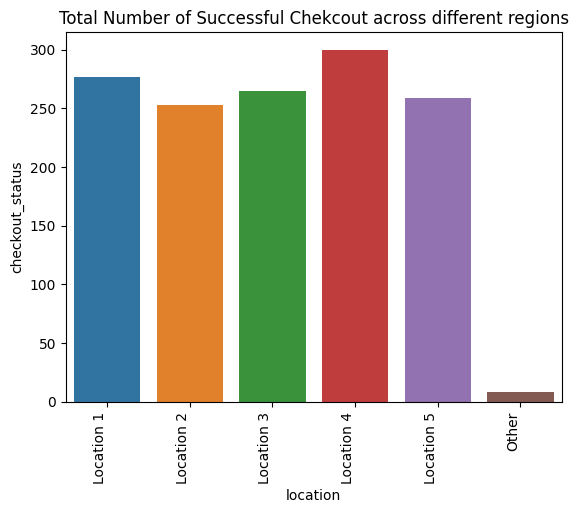

In [273]:
compare_location_checkout = df.groupby('location')['checkout_status'].sum().reset_index()
p = sns.barplot(x="location",y="checkout_status",data=compare_location_checkout)
p.set_xticklabels(p.get_xticklabels(), rotation=90, ha='right')
plt.title("Total Number of Successful Chekcout across different regions")

From the above bargraph we can see that customers from location 4 has the highest number of successful checkouts. 

Text(0.5, 1.0, 'Total time spent across different locations')

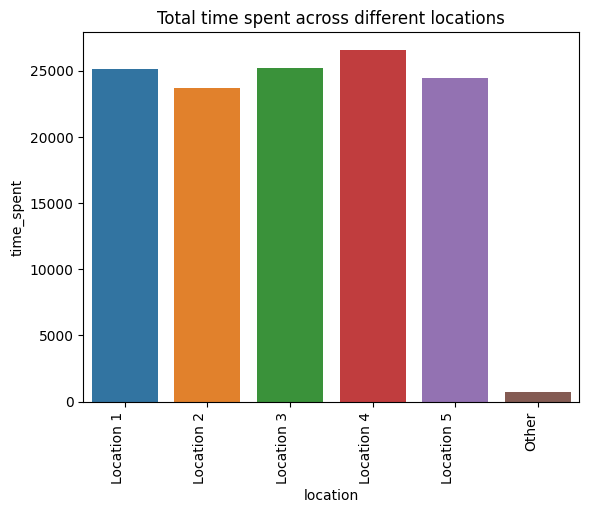

In [274]:
compare_location_time = df.groupby('location')['time_spent'].sum().reset_index()
t = sns.barplot(x="location",y="time_spent",data=compare_location_time)
t.set_xticklabels(t.get_xticklabels(), rotation=90, ha='right')
plt.title("Total time spent across different locations")

<Axes: xlabel='age'>

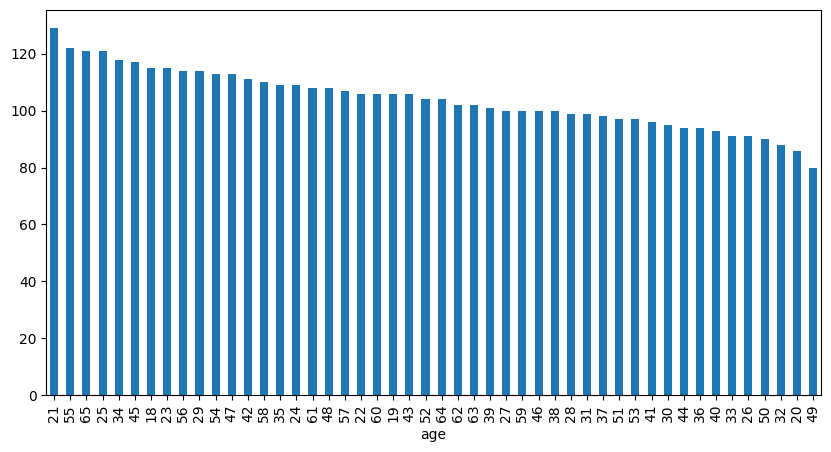

In [275]:
df.groupby('age')['checkout_status'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

From this graph we can see that people in the age of 21 has the highest number of checkouts and people in the age of 49 has the lowest number of successful checkouts. 

<Axes: xlabel='age'>

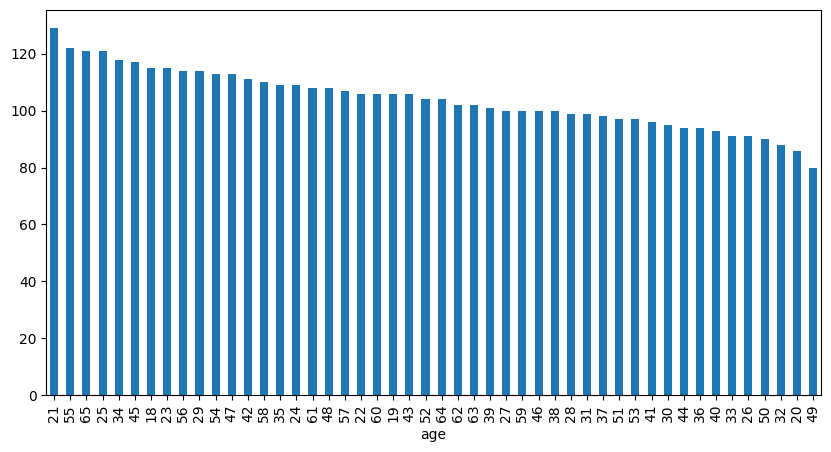

In [276]:
df.groupby('age')['time_spent'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

Text(0.5, 1.0, 'Total time spent across different age')

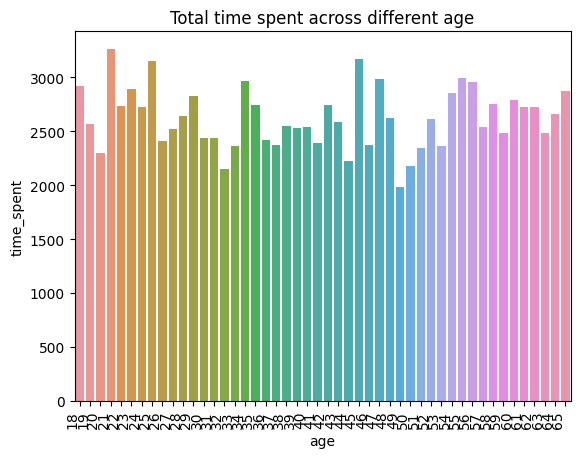

In [277]:
compare_age = df.groupby('age')['time_spent'].sum().reset_index()
a = sns.barplot(x="age",y="time_spent",data=compare_age)
a.set_xticklabels(a.get_xticklabels(), rotation=90, ha='right')
plt.title("Total time spent across different age")

Text(0.5, 1.0, 'Total checkouts for different device type')

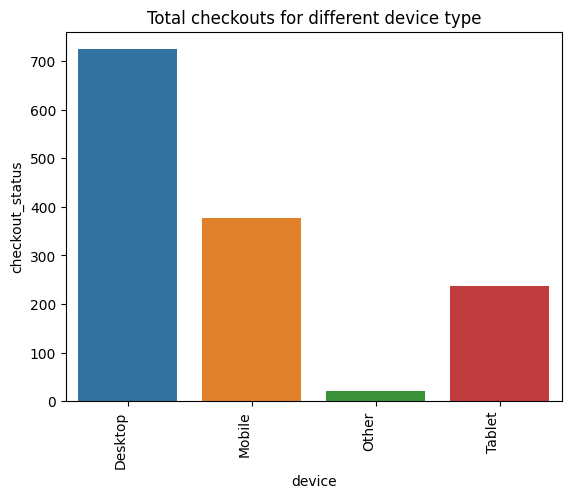

In [278]:
compare_device = df.groupby('device')['checkout_status'].sum().reset_index()
d = sns.barplot(x="device",y="checkout_status",data=compare_device)
d.set_xticklabels(d.get_xticklabels(), rotation=90, ha='right')
plt.title("Total checkouts for different device type")

Another characteristic is that people using desktop are more likely to checkout because desktop has the highest number of total checkouts. 


<Axes: xlabel='age'>

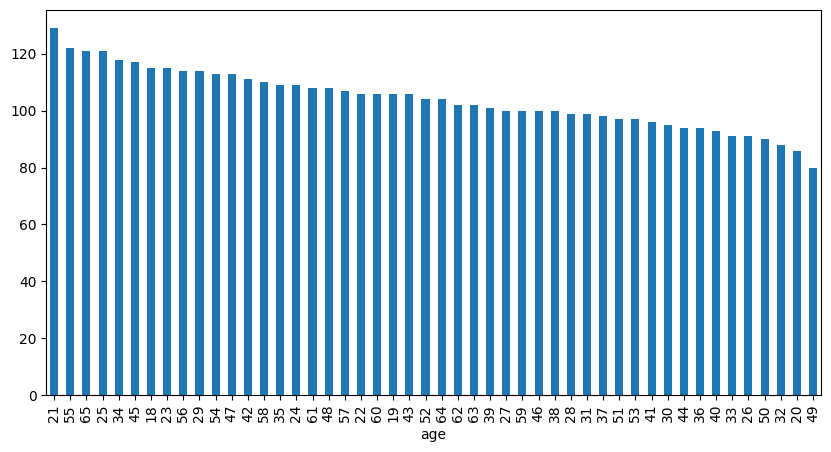

In [279]:
df.groupby('age')['pages_visited'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

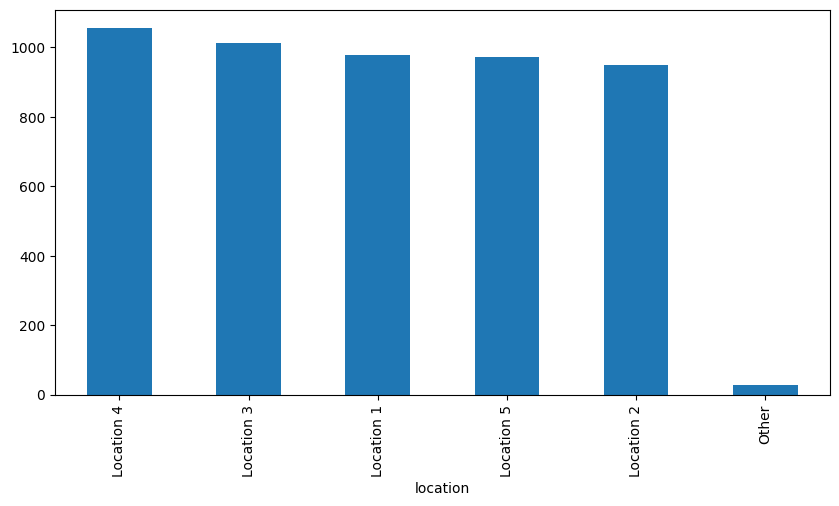

In [281]:
df.groupby('location')['pages_visited'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

Recommendation 

I have constructed several plots to help me visualize and make appropriate recommendations. I applied the groupby function and according to the dataset, number 1 means that the customer did check out, so higher the number means that there are more successful checkouts. Based on the results, customers from  location 4 and customers in the age of 21 have the highest number of checkouts. I have also compared time_spent variable and pages_visited variable so that I have a better idea of customer interaction with the site. After the analysis, customers from location 4 and customers in the age of 21 tend to spend the most time on the site and have visited the most number of pages. Given these evidences, I would strongly recommend the product team to target customers that are aged 21 or near that age, as well as all customers living in location 4, because they tend to have a relatively stronger purchasing power and can potentially generate more sales and revenue. 
